In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

In [2]:
churn_data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+MIPTDS+SEPT22+type@asset+block/churn.zip')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

* RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

→ В файле должно содержаться 10 графиков — 10 ответов к заданиям.

→ Каждый график и преобразования к нему выполняются в отдельной ячейке.

→ Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика

# ЗАДАНИЯ

Для решения итоговых заданий по визуализации вы можете сами выбирать, какую библиотеку использовать. Если у вас возникнут трудности при решении задач, рекомендуем обратиться к документации по библиотекам Matplotlib, Seaborn и Plotly, где собраны сотни различных примеров построения графиков — вы точно найдёте то, что вам нужно. Также предлагаем вам обратиться к специальной литературе по визуализации:

Шпаргалка по визуализации данных в Plotly на Хабре;
Статья от SkillFactory по продвинутой визуализации данных с Plotly на Хабре
Книга по визуализации данных в Matplotlib и Seaborn;

### Вопрос 9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.



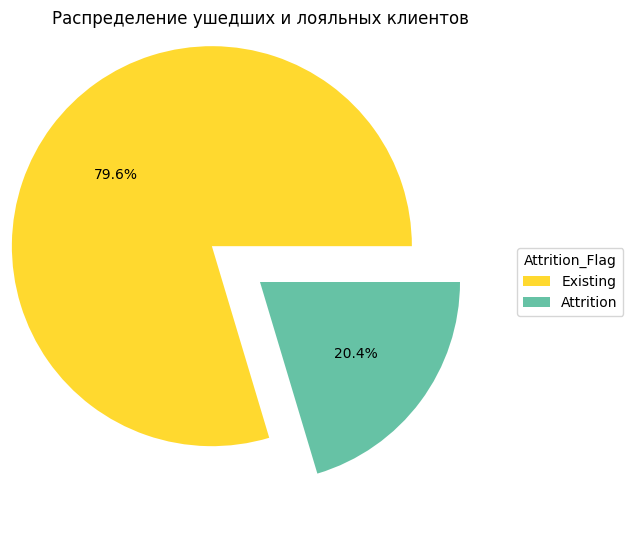

In [3]:
churn_data.loc[churn_data['Exited'] == 1 , 'Exited'] = 'Attrition'
churn_data.loc[churn_data["Exited"] == 0 , "Exited"] = 'Existing'
Attrition_Flag = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

cmap = plt.colormaps["Set2"]
axes.pie(
    Attrition_Flag,
    autopct='%.1f%%',
    explode = [0.3, 0],
    colors = cmap([5, 0])
)
axes.set_title('Распределение ушедших и лояльных клиентов')
axes.legend(
          title="Attrition_Flag",
          labels=Attrition_Flag.index,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1));

Оценивая график, можно с полной уверенностью сказать, что 79,6% клиентской базы - это лояльные клиенты. 20,4% распределения - это склонные к оттоку (ушедшие) клиенты.

### Вопрос 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

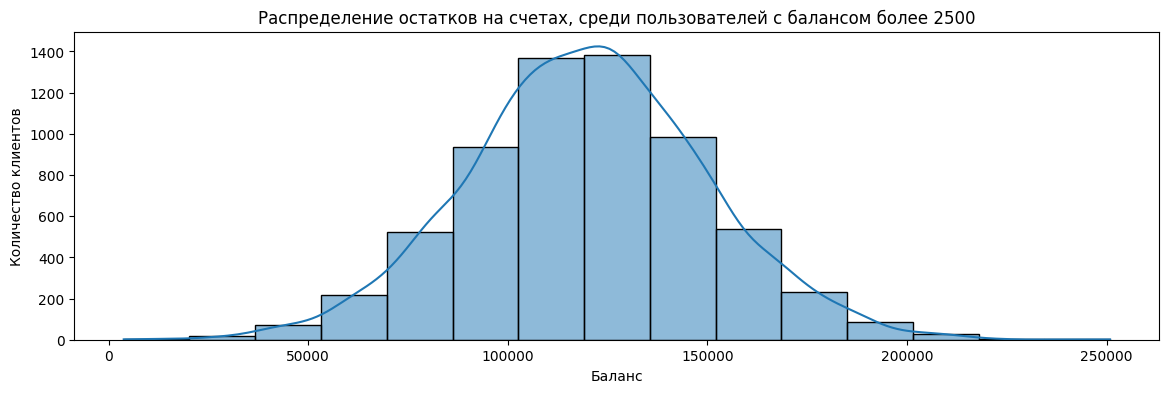

In [4]:
balance_filter_over_2500 = churn_data.loc[churn_data['Balance'] > 2500]
fig = plt.subplots(figsize=(14, 4))

sns.histplot(
    data=balance_filter_over_2500,
    x='Balance',
    bins=15,
    kde=True,
)
plt.title('Распределение остатков на счетах, среди пользователей с балансом более 2500', fontsize=12)
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов');
#plt.xticks(range(2500,250000,20000));

Останки на счетах клиентов в нашей выборке варьируются от 2500 до `250 000 долларов ()это максимальное значение). 
Основная группа клиентов иммет остатки от 85 000 до 165000 долларов. 
Само распределение клиентской с остатками более 2500 долларов близко к нормальному

### Вопрос 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

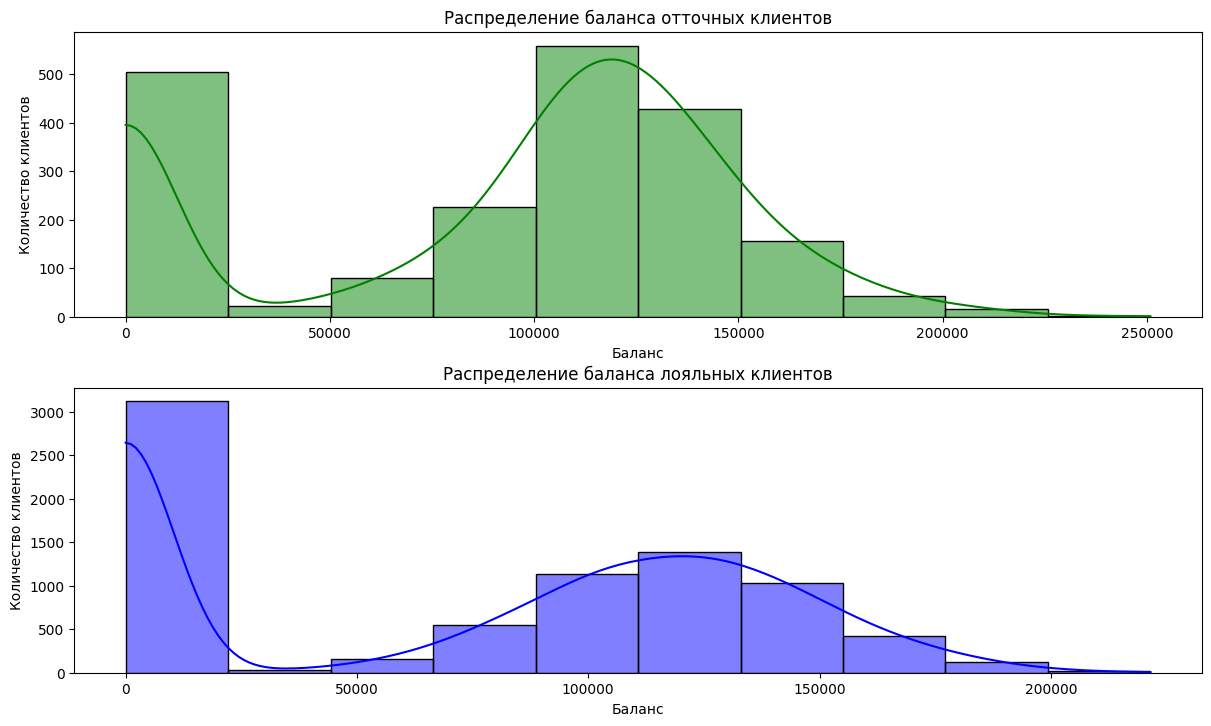

In [5]:
Attrition_clients = churn_data.loc[churn_data['Exited'] == 'Attrition']
Existing_clients = churn_data.loc[churn_data['Exited'] == 'Existing']

fig, axes  = plt.subplots(nrows=2, ncols=1, figsize=(12, 7))
fig.tight_layout(h_pad=3)

sns.histplot(
    data= Attrition_clients,
    x='Balance',
    bins=10,
    color= 'green',
    kde=True,
    ax=axes[0]
);
plt.xlabel('Баланс')
axes[0].set_title('Распределение баланса отточных клиентов', fontsize=12)
axes[0].set_xlabel('Баланс')
axes[0].set_ylabel('Количество клиентов')


sns.histplot(
    data= Existing_clients,
    x='Balance',
    bins=10,
    color='blue',
    kde=True,
    ax=axes[1]   
);
axes[1].set_title('Распределение баланса лояльных клиентов', fontsize=12);
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов');

В части распределения баланса обе группы имеют много сходства. Наибольшая группа клиентов имеют 0 или близкий к 0 остаток на счетах, что формирует определенную синусоиду на старте графика. Для лояльных клиентов, 25% с остатками равными 0. Для ушедших клиентов характерны большие остатки на счетах. В том числе и максимальная сумма остатка принадлежит ушедшему клиенту. Единсвенное отличие - это распределние остатосков в границах, от 100 до 150 тыс. тут большая доля лоятльных клиентов распределена в более высоком ряду. В остальном же, сделать существенные выводы, об отточности клиентов, только на основе баланса не представляется возможным

### Вопрос 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

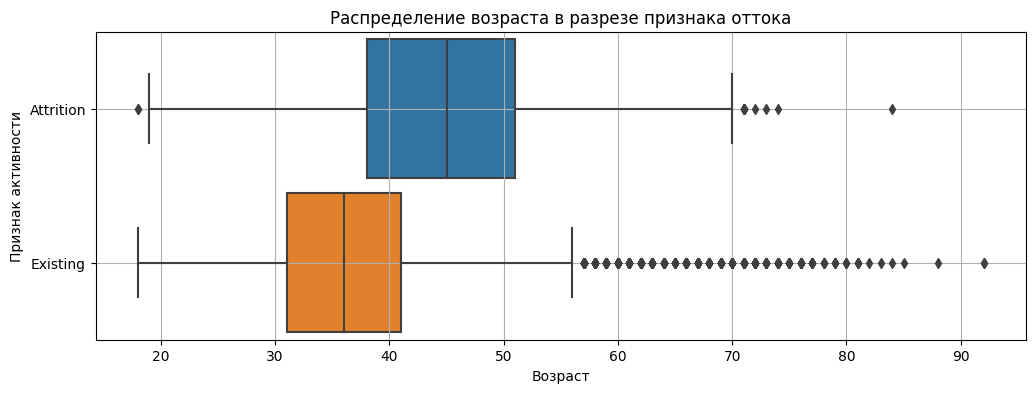

In [6]:
fig = plt.figure(figsize=(12, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста в разрезе признака оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Признак активности');
boxplot.grid()

В группе активных клиентов, мы видим больше потенциальных выбросов.
 При этом, сама группа активных клиентов являеется более молодой.
 В целом следует более пристально посомтреть на группу 55 - 70 лет, и рассмотреть мероприятия по активизации этой группы клиентов.

### Вопрос 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

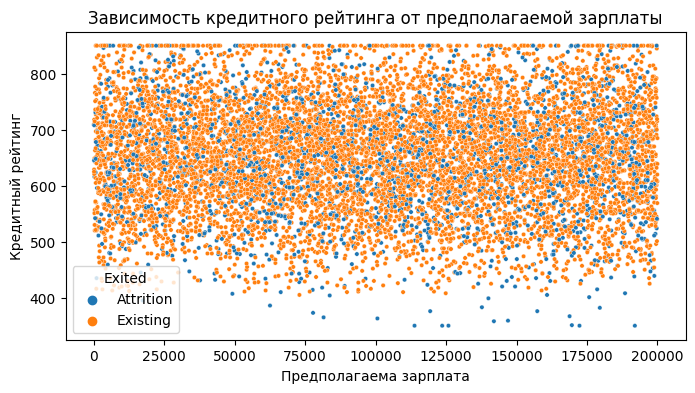

In [7]:
fig = plt.figure(figsize=(8, 4))

sns.scatterplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore', 
    s=10,
    hue = 'Exited',
    marker='o',
    c = 'blue'
);
plt.title('Зависимость кредитного рейтинга от предполагаемой зарплаты');
plt.xlabel('Предполагаема зарплата');
plt.ylabel('Кредитный рейтинг');

Прямой взаимосвязи между предполагаемой зарплатой и кредитным рейтингом нет. 
Дополнительно построили тепловую карту с корреляцией - видим что для наших целевых отрибутов, она близка к 0
Можно заменить только одну зависимость, клиенты с крайне низким кредитным рейтингом (400), уходят из банка. Из имнусов, мы можем обратить внимание, что это, как правило, клиенты с высоким уровнем дохода. В эту сторону следует посомтреть внимательнее.

/var/folders/jn/g9zbfzys667d9y8mfnmbh4fc0000gn/T/ipykernel_9508/458304758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_data.corr());


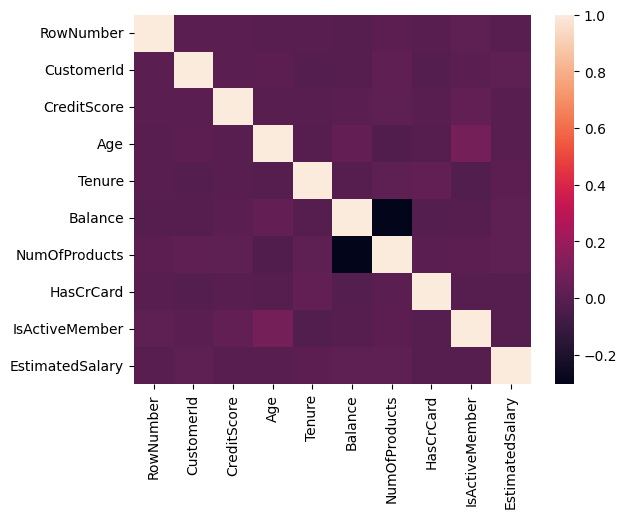

In [8]:
sns.heatmap(churn_data.corr());

### Вопрос 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

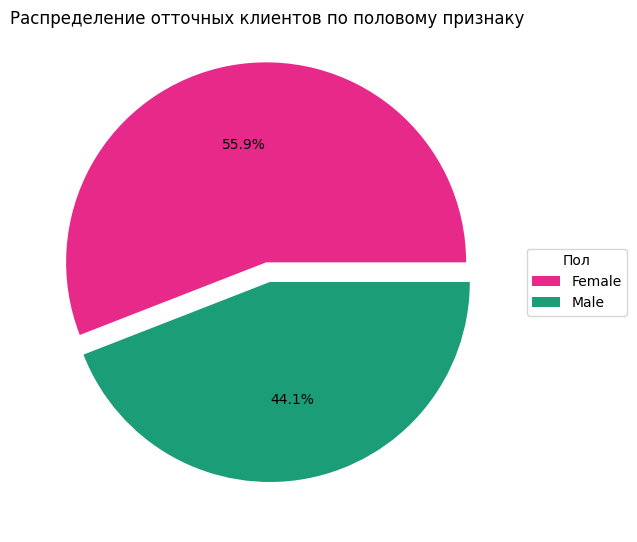

In [9]:
df_gender = Attrition_clients['Gender'].value_counts()

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

cmap = plt.colormaps["Dark2"]
axes.pie(
    df_gender,
    autopct='%.1f%%',
    explode = [0.1, 0],
    colors = cmap([3, 0])
)
axes.set_title('Распределение отточных клиентов по половому признаку ')
axes.legend(
          title="Пол",
          labels=df_gender.index,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1));

Женщины уходят немного чаще

### Вопрос 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [10]:
churn_data.loc[churn_data['Exited'] == 'Attrition' , 'Exited'] = 1
churn_data.loc[churn_data["Exited"] == 'Existing' , "Exited"] = 0

In [11]:
grouped = (
churn_data
    .groupby(by='NumOfProducts', as_index=False)['Exited']
    .sum()
)

fig = px.bar(grouped,
             x="NumOfProducts",
             y="Exited", color='Exited', 
             height=500,
             title='Как отток клиентов зависит от числа приобретённых у банка услуг?')
fig.show()

Видим обратную зависимость. Чем больше продуктов у клиента, тем меньше отточных

### Вопрос 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [12]:
grouped = (
churn_data
    .groupby(by='IsActiveMember', as_index=False)['Exited']
    .sum()
)


fig = px.bar(grouped,
             x="IsActiveMember",
             y="Exited", color='Exited', 
             height=600,
             title='Как влияет наличие статуса активного клиента на отток клиентов?',
             color_continuous_scale='tropic')
fig.show()

### Вопрос 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [13]:
grouped_1 = (
churn_data
    .groupby(by='Geography', as_index=False)['Exited']
    .sum())

grouped_2 = (
churn_data
    .groupby(by='Geography', as_index=False)['Exited']
    .count())

grouped = grouped_1.merge(grouped_2,how='inner', left_on = 'Geography', right_on='Geography')

grouped['target'] = ((grouped['Exited_x']/ grouped['Exited_y'])*100).round(2)

fig = px.choropleth(
    data_frame=grouped, 
    locations="Geography", 
    locationmode = "country names", 
    range_color=[0, 35],
    color="target", 
    title='Доля ушедших клиентов, в зависимости от региона ', 
    width=1200,
    height=600, 
    color_continuous_scale='ylgnbu' 
)

fig.show()

Наибольший отток, относительно клиенской базы по региону зафиксирован в Германии.
В абсолютных значениях отток практически сопостовим во Франции и Германии.  

### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [14]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)

fig = go.Figure(data=go.Heatmap(                 
                   z = pivot,
                   x = pivot.columns,
                   y= churn_data['CreditScoreCat'].unique(),
                   text=pivot.values.round(2),
                   texttemplate="%{text}",
                   textfont={"size":15},
                
                   )
)
fig.update_layout(template = 'plotly_dark') # темная тема
fig.show()

* Чаще всего уходят новые клиенты с крайне низким кредитным рейтингом (вероятно, те продукты, которые они надеялись получить в банке, оказались для них недоступны).
* Далее идут клиенты с 10-летним стажем, но также крайне низким кредитным рейтингом, вероятно им также оказались недоступны какие-то продукты, в которых они нуждаются.
* Далее клиенты с 3-4 летним стажем и крайне низким кредитным рейтингом. Вероятно, эти клиенты ожидали, что со временем произойдет улучшение их клиентсокй позиции, но этого не произошло. Можно предположить, что завершился срок какого-то продукта клиента 
* Далее мы видим много ушедших клиентов среди самого высокого кредитного рейтинга. Здесь можно выделить 3 категории:
 * * ушедшие сразу (вероятно, не нашли в нашем банке нужные продукты или качество услуг)
 * * ушедшие через 5-6 и через 9-10 лет (возможно, нет каких-то дополнительных программ, связанных с изменением их социального статуса. 